<a href="https://colab.research.google.com/github/Aehteshaam-Shaikh/Health-Insurance-Cross-Sell-Production/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing the dataset
health_df = pd.read_csv('/content/drive/MyDrive/Health Insurance Cross Sell Prediction - Aehteshaam Shaikh/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [6]:
# Let's see how the dataset looks like
health_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [7]:
# basic information about the dataset
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB




*   The Dataset consist of 381109 entries with 12 features
*   Out of these 12 features, 9 are numeric while 3 are of object type.



In [12]:
# checking for the duplicate values
health_df.duplicated().sum()

0

*   No duplicated values are present in the dataset

In [14]:
# checking for the Null Values
health_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

*   **Luckily, the dataset doesn't have any feature with Null Values!!!**

In [18]:
health_df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


#**Let's do some EDA**

In [67]:
# Target Variable
health_df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

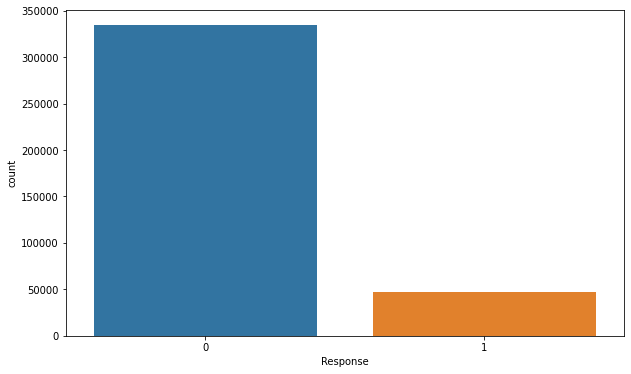

In [66]:
# plotting the Response column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Response']);

* **The Target variable is highly imbalance with maximum customers having no interest in insurance policy.**

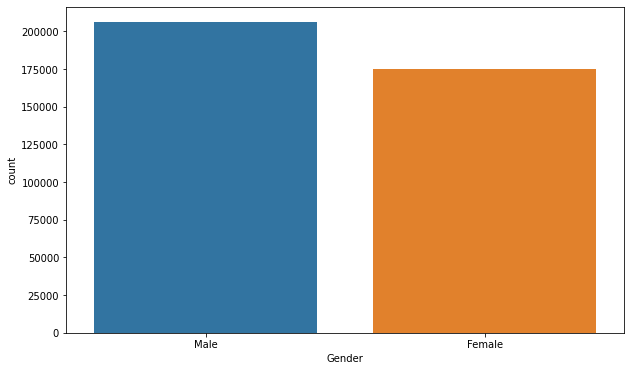

In [21]:
# plotting the Gender column to get the count of males and females 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Gender']);



*   **As we can see the Male Policyholders are more(slightly) than Female policyholders**




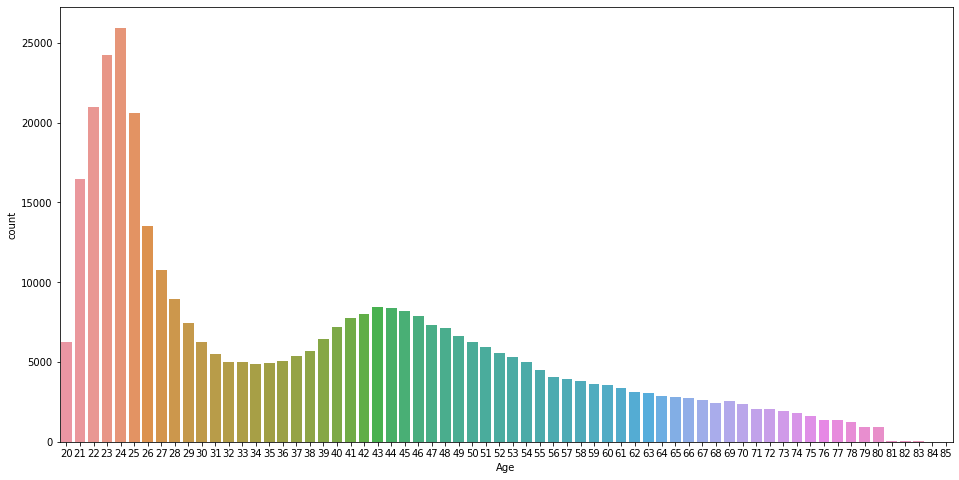

In [24]:
# plotting the Age column 
plt.figure(figsize=(16,8))
sns.countplot(health_df['Age']);

*   **The Age of policyholders ranges from 20 to 80.**
*    **The younger people from age 21 to 28 are interested more in the policy.**  



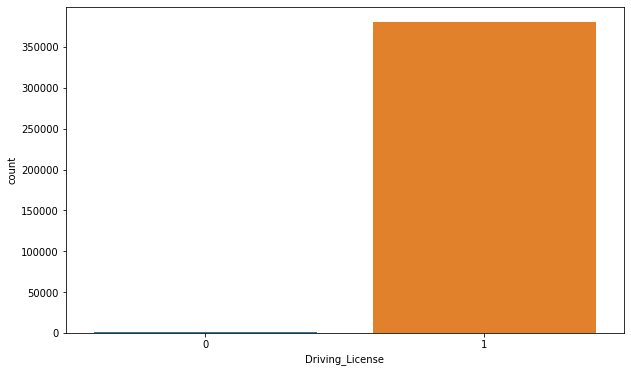

In [31]:
# plotting the Driving_License column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Driving_License']);

* **All of the policyholders acquire a driving licence.** 

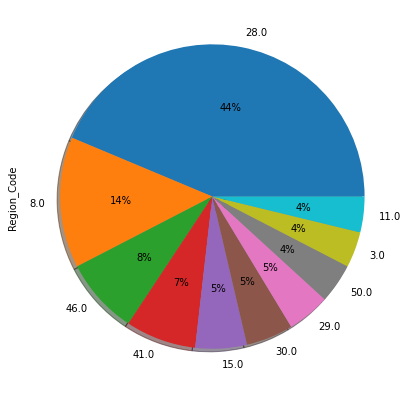

In [57]:
# plotting the Region_Code column with it's top 10 entries. 
plt.figure(figsize=(14,7))
health_df['Region_Code'].value_counts().nlargest(10).plot(kind='pie',autopct='%.0f%%',shadow = True);


* **Most of the policyholders belong to the region that has region code 28.**

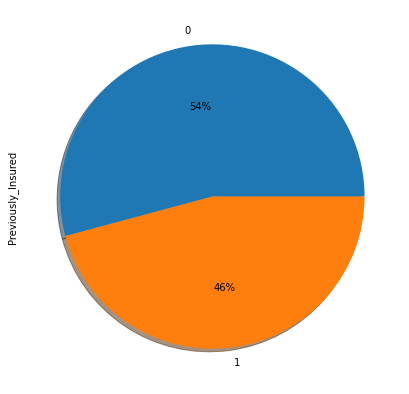

In [60]:

# plotting the Previously_Insured column 
plt.figure(figsize=(14,7))
health_df['Previously_Insured'].value_counts().plot( kind='pie',autopct='%.0f%%',shadow = True);

* **Around 54% of the customers does not have the vehicle insurance while 46% of the customers already have it.**

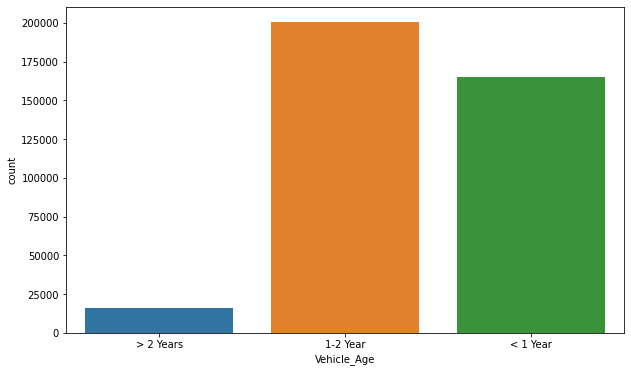

In [61]:
# plotting the Vehicle_Age column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Vehicle_Age']);

* **Most of the customers have vehicles that are 1-2 years old.**
* **Very few customers have a vehicle more than 2 years old.**

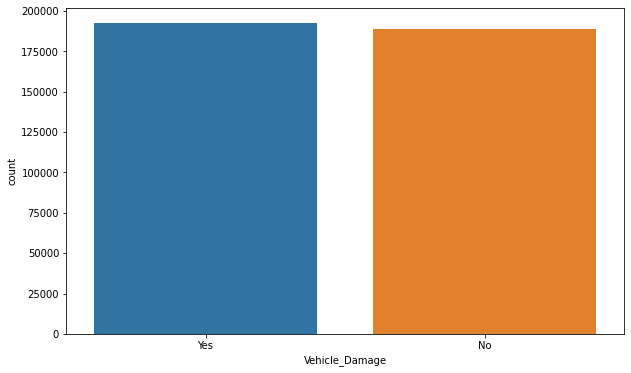

In [62]:
# plotting the Vehicle_Damage column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Vehicle_Damage']);

* **The plot shows that the number of customers who damaged their vehicles and the ones who didn't are almost equal.**

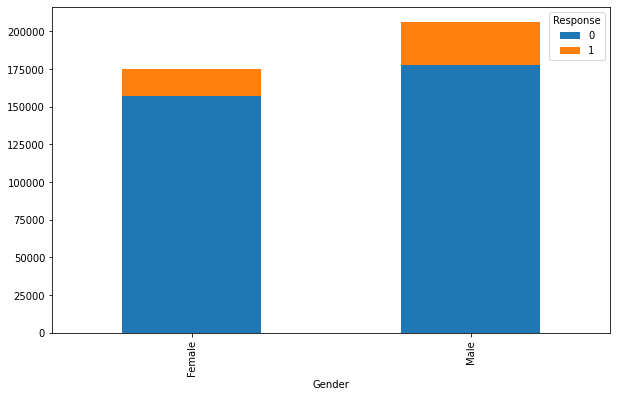

In [96]:
ct = pd.crosstab(health_df['Gender'],health_df['Response'])
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
